In [56]:
import scipy
from scipy import spatial
import numpy as np
import matplotlib.pyplot as plt

In [157]:
def prior_draw(num_points, num_funcs, sigma, length):
    X_test = np.expand_dims(np.linspace(-5, 5, num_points), axis=1)
    K = (sigma**2)*np.exp(-0.5*(1.0/(length**2))*spatial.distance.cdist(X_test, X_test, metric='sqeuclidean'))
    u = np.zeros(num_points)
    Y_test = np.random.multivariate_normal(u, K, num_funcs)
    plt.xlim((-5, 5))
    plt.ylim(-10, 10)
    plt.grid()
    for i in range(num_funcs):
        plt.plot(X_test, Y_test[i], linestyle='-', marker='o', markersize=2)

\# functions: 1 

$\sigma$: 1

$l$: 1

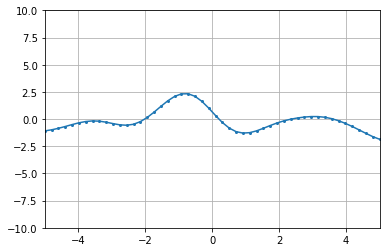

In [158]:
prior_draw(50, 1, 1, 1)

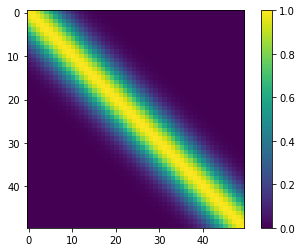

In [159]:
X_test = np.expand_dims(np.linspace(-5, 5, 50), axis=1)
K = (1**2)*np.exp(-0.5*(1.0/(1**2))*spatial.distance.cdist(X_test, X_test, metric='sqeuclidean'))
plt.imshow(K)
plt.colorbar()

\# functions: 1 

$\sigma$: 2

$l$: 1

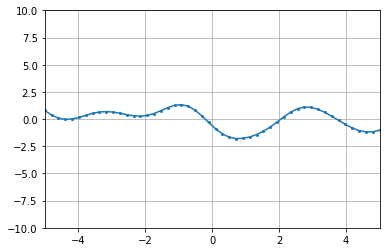

In [160]:
prior_draw(50, 1, 2, 1)

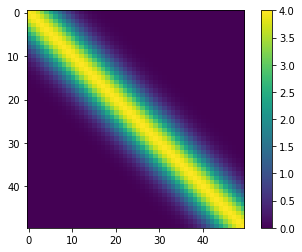

In [161]:
X_test = np.expand_dims(np.linspace(-5, 5, 50), axis=1)
K = (2**2)*np.exp(-0.5*(1.0/(1**2))*spatial.distance.cdist(X_test, X_test, metric='sqeuclidean'))
plt.imshow(K)
plt.colorbar()

\# functions: 1 

$\sigma$: 2

$l$: 0.3

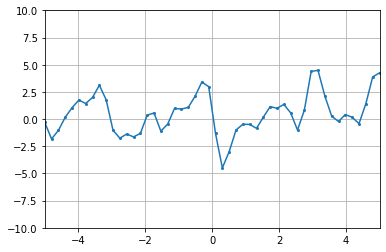

In [162]:
prior_draw(50, 1, 2, 0.3)

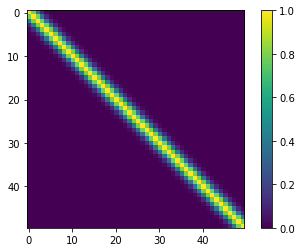

In [163]:
X_test = np.expand_dims(np.linspace(-5, 5, 50), axis=1)
K = (1**2)*np.exp(-0.5*(1.0/(0.3**2))*spatial.distance.cdist(X_test, X_test, metric='sqeuclidean'))
plt.imshow(K)
plt.colorbar()

\# functions: 50 

$\sigma$: 2

$l$: 1

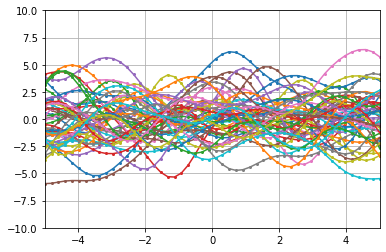

In [164]:
prior_draw(50, 50, 2, 1)

\# functions: 500 

$\sigma$: 2

$l$: 1

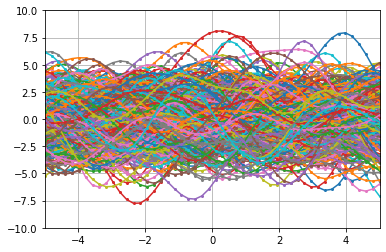

In [165]:
prior_draw(50, 500, 2, 1)

In [144]:
X_test = np.expand_dims(np.linspace(-5, 5, 100), axis=1)
X = np.expand_dims([-4, -3, -1, 0, 1.5], axis=1)
Y = np.expand_dims([-2, 0, 1, 2, -1], axis=1)
K = np.exp(-0.5*spatial.distance.cdist(X, X, metric='sqeuclidean'))
K_test_K = np.exp(-0.5*spatial.distance.cdist(X_test, X, metric='sqeuclidean'))
K_test_K_test = np.exp(-0.5*spatial.distance.cdist(X_test, X_test, metric='sqeuclidean'))
KK_test = np.exp(-0.5*spatial.distance.cdist(X, X_test, metric='sqeuclidean'))
K_inv = np.linalg.inv(K)
u = np.matmul(np.matmul(K_test_K, K_inv), Y).flatten()
cov = K_test_K_test - np.matmul(np.matmul(K_test_K, K_inv), KK_test)
Y_test = np.random.multivariate_normal(u, cov, 30)


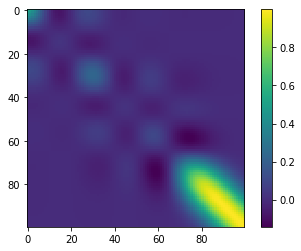

In [145]:
plt.imshow(cov)
plt.colorbar()

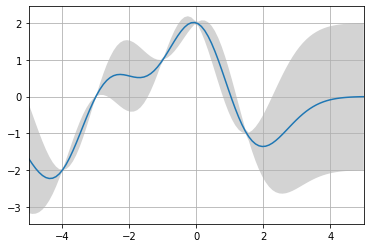

In [152]:
fig, ax = plt.subplots(1)
ax.plot(X_test, u)
ax.fill_between(X_test.flatten(), u+2.0*np.sqrt(cov.diagonal()), u-2.0*np.sqrt(cov.diagonal()), facecolor='lightgrey')
# ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='yellow', alpha=0.5)
# ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
# ax.legend(loc='upper left')
# ax.set_xlabel('num steps')
# ax.set_ylabel('position')
plt.xlim((-5, 5))
ax.grid()

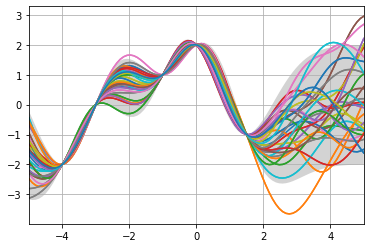

In [153]:
fig, ax = plt.subplots(1)
plt.xlim((-5, 5))
ax.plot(X_test, u)
for i in range(30):
    ax.plot(X_test, Y_test[i])
ax.fill_between(X_test.flatten(), u+2.0*np.sqrt(cov.diagonal()), u-2.0*np.sqrt(cov.diagonal()), facecolor='lightgrey')
ax.grid()
for i in range(30):
    plt.plot(X_test, Y_test[i], linestyle='-')

In [73]:
X = np.expand_dims(np.random.uniform(-4, 4, 500), axis=1)
Y = np.expand_dims(np.sin(X).flatten() + np.sqrt(0.1)*np.random.randn(500), axis=1) 

In [74]:
noise = 0.1
L = np.linalg.cholesky(np.exp(-0.5*spatial.distance.cdist(X, X, metric='sqeuclidean')) + np.diag(np.zeros(500) + noise))

In [75]:
alpha = np.linalg.solve(L.T, np.linalg.solve(L, Y))

In [76]:
def mean_var_pred(x_test):
    k_test = np.exp(-0.5*spatial.distance.cdist(x_test, X, metric='sqeuclidean')).T
    u = np.matmul(k_test.T, alpha)
    v = np.linalg.solve(L, k_test)
    k_test_k_test = np.exp(-0.5*spatial.distance.cdist(x_test, x_test, metric='sqeuclidean'))
    Var = k_test_k_test - np.matmul(v.T, v) + noise
    return u, Var

In [77]:
x_test = np.linspace(-5, 5, 500)
y_pred = np.zeros(500)
y_pred_noise = np.zeros(500)
for i in range(500):
    y_pred[i], cov = mean_var_pred([[x_test[i]]])
    y_pred_noise[i] = np.random.multivariate_normal([y_pred[i]], cov, 1)

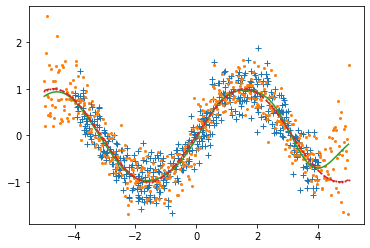

In [78]:
plt.plot(X, Y, linestyle='', marker='+')
plt.plot(x_test, y_pred_noise, linestyle='', marker='o', markersize=2)
plt.plot(x_test, y_pred, linestyle='-')
plt.plot(np.linspace(-5, 5, 100), np.sin(np.linspace(-5, 5, 100)), linestyle='--', marker='o', markersize=1)

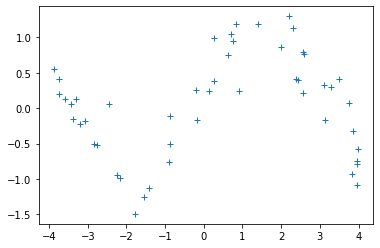

In [63]:
X = np.expand_dims(np.random.uniform(-4, 4, 50), axis=1)
Y = np.expand_dims(np.sin(X).flatten() + np.sqrt(0.1)*np.random.randn(50), axis=1) 
plt.plot(X, Y, linestyle='', marker='+')

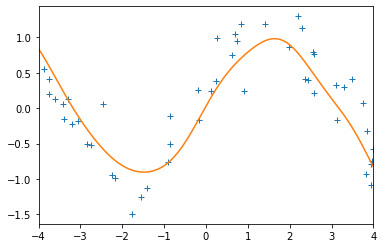

In [64]:
plt.plot(X, Y, linestyle='', marker='+')
plt.xlim((-4, 4))
# plt.plot(np.linspace(-5, 5, 100), np.sin(np.linspace(-5, 5, 100)), linestyle='-', marker='o', markersize=1, color='red')
plt.plot(x_test, y_pred, linestyle='-')

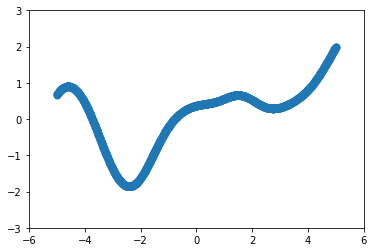

In [149]:
test_num = 1000
X_test = np.expand_dims(np.linspace(-5, 5, test_num), axis=1)
K = np.exp(-0.5*spatial.distance.cdist(X_test, X_test, metric='sqeuclidean'))
u = np.zeros(test_num)
Y_test = np.random.multivariate_normal(u, K, 1)
for i in range(1):
    plt.xlim((-6, 6))
    plt.ylim(-3, 3)
    plt.plot(X_test, Y_test[i], linestyle='', marker='o', markersize=7)